In [1]:
import RNA
import numpy as np

import subprocess
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import SVG, display
from collections import Counter
from collections import defaultdict

import difflib
import sys
import os
import random
import string
import time

import helper

import pandas as pd

In [21]:
sequence = "AAAAUAAUGUACCGGACAUUCGCGCACGACCACCAUAUGGCAGAGCAUGU"
s1 = ".....(((((.....)))))...((.(..(((.....)))..).))...."
#          X             X
s2 = "......((((.....))))....((.(..(((.....)))..).))...."


sequence = "AUAAUGUACCGGACAUUCG"
s1       = "..(((((.....))))).."
#             X             X
# s2       = "...((((.....))))..."   # delete
s2       = "..((((((...)))))).."   # insert

i = -3
j = -17



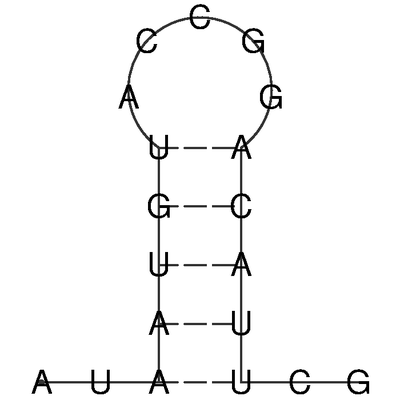

In [91]:
size = 400
helper.plot_layout(sequence, s1, layout=3, size=size)

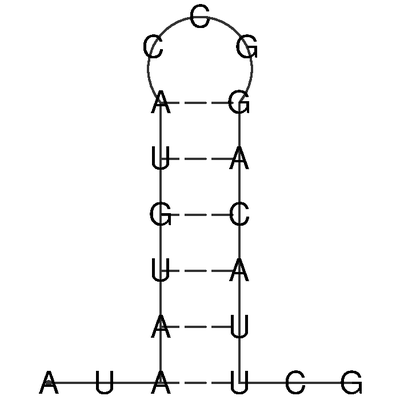

In [94]:
size = 400
helper.plot_layout(sequence, s2, layout=3, size=size)

In [9]:
fc = RNA.fold_compound(sequence)

en1 = fc.eval_structure(s1)
en2 = en1 + fc.eval_move(s1, i, j)
print (en1, en2)

en2 = fc.eval_structure(s2)
print (en1, en2)

-1.100000023841858 -0.40000003576278687
-1.100000023841858 -0.4000000059604645


In [22]:
pt1 = list(RNA.ptable(s2))
le = pt1.copy()

# different way to calculate initial energy in kcal/mol
for n in range(len(pt1)):
    if (pt1[n] == 0 or pt1[n] < n):
        le[n] = 0;
    else:
        le[n] = fc.eval_loop_pt(n, pt1)/100.0

en1 = sum(le)

print (pt1)
print (le)
print ('sum of loop en', sum(le))

old_loop = fc.eval_loop_pt(-i, pt1)/100.0

m1 = -3
m2 = -17
# m1 = 11
# m2 = 15

en1 = fc.eval_structure(s2)
en2 = en1 + fc.eval_move(s1, m1, m2)
print ('eval structure s1', en1, 'eval move to s2:', en2)

# i = m1 if m1>0 else -m1
# j = m2 if m2>0 else -m2

# pt1[-i] = 0
# pt1[-j] = 0

# # to get en2, substract the old loop energy from en1
# en2 = en1 - old_loop

# print (fc.eval_structure_pt(pt1)/100)

# print (en1, en2)

[19, 0, 0, 17, 16, 15, 14, 13, 12, 0, 0, 0, 8, 7, 6, 5, 4, 3, 0, 0]
[0.0, 0, 0, -0.9, -1.1, -2.1, -2.2, -0.9, 5.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of loop en -1.2999999999999998
eval structure s1 -1.2999999523162842 eval move to s2: -0.5999999642372131


In [86]:
# find enclosing bp 

#     for (j = l + 1; j <= len; j++) {
#         if (pt[j] <= 0) continue; /* unpaired */

#         if (pt[j] < k) break; /* found it */

#         if (pt[j] > j) {
#             j = pt[j]; /* skip substructure */

pt1 = list(RNA.ptable(s1))

m1 = -6
m2 = -20
m1 = 11
m2 = 15

en1 = fc.eval_structure(s1)
en2 = en1 + fc.eval_move(s1, m1, m2)
print (en1, en2)

k = m1 if m1>0 else -m1
l = m2 if m2>0 else -m2

j = l+1

while (True):

    if j>=pt1[0]:
        break   
    if (pt1[j] <= 0):
        j += 1
        continue
    if (pt1[j] < k):
        break;
    if (pt1[j] > j):
        j = pt1[j]; 
    j += 1    
    
i = pt1[j] if (j <= pt1[0]) else 0;

print (i, k, l, j)



# pre (only insert loop variation here)

pre = fc.eval_loop_pt(i, pt1)
pre = le[i]*100
print ('remove pre value at pos', i, ':', pre)


# adjust pairing table

s1 = RNA.db_from_ptable(pt1)

pt2 = pt1.copy()
pt2[m1] = m2
pt2[m2] = m1



s2 = RNA.db_from_ptable(pt2)

new_loop1 = fc.eval_loop_pt(i, pt2)
print ('new loop eval at pos', i, ':', new_loop1)
new_loop2 = fc.eval_loop_pt(k, pt2)
print ('new loop eval at pos', k, ':', new_loop2)
post = new_loop1 + new_loop2
print (post - pre)



print (s1)
print (s2)

print ('expected result', fc.eval_structure_pt(pt1) + fc.eval_move_pt(pt1, m1, m2))
print ('expected result', fc.eval_structure_pt(pt1), fc.eval_structure_pt(pt2))



-5.300000190734863 -5.5000001937150955
10 11 15 16
remove pre value at pos 10 : 520.0
new loop eval at pos 10 : -90
new loop eval at pos 11 : 590
-20.0
.....(((((.....)))))...((.(..(((.....)))..).))....
.....((((((...))))))...((.(..(((.....)))..).))....
expected result -550
expected result -530 -550
